In [1]:
# import libariries 

In [3]:
import pandas as pd 
import sqlite3

In [4]:
# load clean dataset 

In [5]:
df = pd.read_csv('hr_cleaned.csv')

In [6]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Attrition,Tenure
0,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,Yes,444
1,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,Yes,447
2,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,Yes,1884
3,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12,Yes,2194
4,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15,Yes,1631


In [7]:
# Create SQL Database inside Notebook 

In [8]:
conn = sqlite3.connect("hr_database.db")

In [9]:
# Upload Data to SQL Table

In [10]:
df.to_sql("hr_data", conn, if_exists="replace", index=False)

104

In [11]:
# Run SQL Queries

In [12]:
query = "SELECT COUNT(*) FROM hr_data"
pd.read_sql(query, conn)

,COUNT(*)
0,104


In [13]:
# Attrition Count

In [14]:
query = """
SELECT Attrition, COUNT(*)
FROM hr_data
GROUP BY Attrition
"""
pd.read_sql(query, conn)

,Attrition,COUNT(*)
0,Yes,104


In [15]:
# Using ipython-sql (More Professional)

In [16]:
# Install extension 
!pip install ipython-sql

  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.7
    Uninstalling SQLAlchemy-1.4.7:
      Successfully uninstalled SQLAlchemy-1.4.7


In [17]:
# Load Extension
%load_ext sql

In [19]:
# Conect databse 
%sql sqlite:///hr_database.db

In [24]:
# Run SQL Directly
query = """
SELECT DeptID, COUNT(*)
FROM hr_data
GROUP BY DeptID
"""

pd.read_sql(query, conn)

,DeptID,COUNT(*)
0,1,3
1,3,10
2,4,3
3,5,83
4,6,5


In [25]:
result = pd.read_sql(query, conn)

In [26]:
result

,DeptID,COUNT(*)
0,1,3
1,3,10
2,4,3
3,5,83
4,6,5


In [30]:
# Convert Output To Chart 
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='DeptID'>

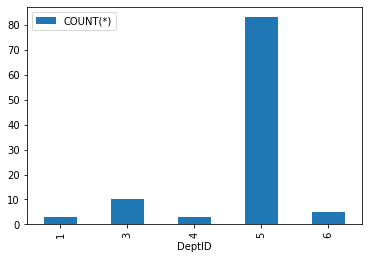

In [32]:
result.plot(kind='bar', x='DeptID')

In [35]:
# Total employees

In [37]:
query = "SELECT COUNT(*) FROM hr_data"
pd.read_sql(query, conn)

,COUNT(*)
0,104


In [38]:
conn = sqlite3.connect("hr_database.db")

In [33]:
# commons mistakes to check - Sometimes table name mismatch causes error.

In [34]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql(query, conn)

,name
0,hr_data
